# Least-Squares Regression
## Prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

## Abstract
In this report we used the Least-Squares Regression method to obtain best curves for fitting the given data. By using points in 2D it shows three methods of performing linear regression: a straight line, a power equation, a saturation-growth-rate equation. Then we used polynomial regression to fit the parabola equation. For a 3D we used method of multiple linear regression. For each method there are calculated coefficients, the standard errors and the correlations coefficients. Also report will provide graphical results of equations and compare results of best fitting method.


## Introduction 
All five methods are very powerful to plot curve by fitting the given data.    
### Theory
From Chapra and Canale's we can find depth information about each methods. Let's briefly introduce and describe all methods.

For each we have certain formula:

1)A straight line $y = a_0 + a_1 \times x_i$, where

\begin{equation*}
a_1 = \frac{n\sum{x_iy_i} - \sum{x_i}\sum{y_i}}{n\sum{x_i^2}-(\sum{x_i})^2}
\end{equation*} 

\begin{equation*}
a_0 = \overline{y}-a_1\overline{x}
\end{equation*}


2)A power equation $y = \alpha x \beta$

By using next steps we will obtain by linearization 
   
$\ln y  = \ln\alpha + \beta\ln x$

$y'  = a_0' + a_1' x'$

And we can calculate $\beta = a$, $\alpha = e^{a_0}$

3)A saturation-growth-rate equation $y = \frac{\alpha x}{\beta + x}$

$\frac{1}{y}= \frac{\beta}{\alpha}\frac{1}{x}+ \frac{1}{\alpha}$

$y'  = a_0' + a_1' x'$

$a_0 = \frac{1}{\alpha}$, $a_1 = \frac{\beta}{\alpha}$

4)A parobola equaiton $y = a_0 + a_1x + a_2x^2$
To find coefficients we need to solve matrix equation $Ax=B$.

Where, matrix $A$ is

\begin{bmatrix}
       n & \sum{x_i}  & \sum{x_i}^2         \\[0.3em]
       \sum{x_i} & \sum{x_i}^2  & \sum{x_i}^3 \\[0.3em]
       \sum{x_i}^2 & \sum{x_i}^3 & \sum{x_i}^4
\end{bmatrix}

matrix $x$ is
\begin{bmatrix}
       a_0         \\[0.3em]
       a_1 \\[0.3em]
       a_2
\end{bmatrix}
and matrix $B$ is
\begin{bmatrix}
       \sum{y_i}         \\[0.3em]
       \sum{x_iy_i}         \\[0.3em]
       \sum{x_i^2y_i}         \\[0.3em]
\end{bmatrix}
5) Multiple linear regression $y = a_0 + a_1x_1 + a_2x_2$
We again will solve it by using matrix equation

Matrix $A$
\begin{bmatrix}
       n & \sum{x_{1i}}  & \sum{x_{2i}}        \\[0.3em]
       \sum{x_{1i}} & \sum{x_{1i}}^2  & \sum{x_{1i}x_{2i}} \\[0.3em]
       \sum{x_{2i}} & \sum{x_{1i}x_{2i}} & \sum{x_{2i}^2}
\end{bmatrix}

Matrix $x$
\begin{bmatrix}
       a_0         \\[0.3em]
       a_1 \\[0.3em]
       a_2
\end{bmatrix}

Matrix $B$
\begin{bmatrix}
       \sum{y_i}         \\[0.3em]
       \sum{x_{1i}y_i}         \\[0.3em]
       \sum{x_{2i}y_i}         \\[0.3em]
\end{bmatrix}


    Matrix $B$
Next step, as we said we need to calculate the standard error of estimates and the correlations coefficent.

$S_r=\sum(y_0-y_i)^2$

$S_t=\sum(y_i-\overline{y})^2$

Standard error of the estimate:
$S_{y/x}=\sqrt{\frac{S_r}{m-2}}$

The correlations coefficient
$r = \sqrt{\frac{S_t - S_r}{S_t}}$

We know that method with minimal $S_{y/x}$ is the best curve fitting of data.

From Chapra and Canale's book if $r$ is approaches to 1 means than method had perfect fit. 

## Methods

Here you see our arrays of $x$ and $y$ in 2D space. We plot a graph of these points and we calculate mean of $y$, it will be needed later. For each method we will compute coefficients, the standard error of estimate and the correlations coefficient.

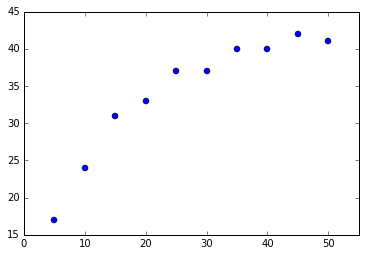

In [339]:
%matplotlib inline
from matplotlib.pyplot import *
from math import log
from math import exp
from math import sqrt 
import numpy as np

x = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y = np.array([17, 24, 31, 33, 37, 37, 40, 40, 42, 41])
n = 10

axes = gca()
axes.set_xlim([0,55])
plot(x, y, 'bo')
show()

std1 = 0
std2 = 0
std3 = 0
std4 = 0
ym = 0

for i in range(n):
    ym += y[i]
ym /= n
st = 0
for i in range(n):
    st += (y[i] - ym)**2

This is first method a straight line with obtained results below.

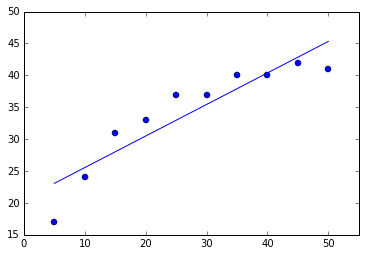

Standard error of the estimate of a straight line formula is  3.485032933195115
The correlations coefficent of a straight line formula is  0.9156917035433403
Coefficent:
  a0 = 20.6 
  a1 = 0.494545454545


In [340]:
sx = 0
sy = 0
sxy = 0
sxx = 0
std1 = 0
for i in range(n):
        sxy += x[i]*y[i]
        sx += x[i]
        sy += y[i]
        sxx += x[i] * x[i]
a1 = (n * sxy - sx*sy) / (n*sxx - sx * sx)
xm = sx / n
ym = sy / n
a0 = ym - a1 * xm

y0 = np.array(np.zeros(10))
for i in range(n):
    y0[i] = a0 + a1* x[i]
    std1 += (y[i] - y0[i])**2 
    
r = sqrt((st-std1)/st)
std1 = sqrt(std1/(n-2))

axes = gca()
axes.set_xlim([0,55])
plot(x, y, 'bo')
plot(x, y0)
show()
print("Standard error of the estimate of a straight line formula is ", std1)
print("The correlations coefficent of a straight line formula is ", r)
print("Coefficent:\n  a0 =", a0, "\n  a1 =", a1)

The second method method a power equation with obtained results.

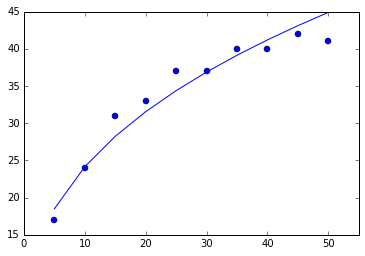

Standard error of the estimate of a power equation formula is  2.164475337933126
The correlations coefficent of a power equation formula is is  0.9683491553096023
Coefficent:
  l = 9.952915111289037 
  b = 0.385077205319


In [341]:
x1 = np.array(np.zeros(10))
y1 = np.array(np.zeros(10))

for i in range(10):
    x1[i] = log(x[i])
    y1[i] = log(y[i])
sx = 0
sy = 0
sxy = 0
sxx = 0
std2 = 0
for i in range(n):
        sxy += x1[i] * y1[i]
        sx += x1[i]
        sy += y1[i]
        sxx += x1[i] * x1[i]
a1 = (n * sxy - sx*sy) / (n*sxx - sx * sx)
xm = sx / n
ym = sy / n
a0 = ym - a1 * xm

b = a1
l = exp(a0)

y0 = np.array(np.zeros(10))
for i in range(n):
    y0[i]  = l*x[i]**b
    std2 += (y[i] - y0[i])**2
r = sqrt((st-std2)/st)
std2 = sqrt(std2/(n-2))

axes = gca()
axes.set_xlim([0,55])
plot(x, y, 'bo')
plot(x, y0)
show()
print("Standard error of the estimate of a power equation formula is ", std2)
print("The correlations coefficent of a power equation formula is is ", r)
print("Coefficent:\n  l =", l, "\n  b =", b)

The third method a saturation-growth-rate equation with obtained results. 

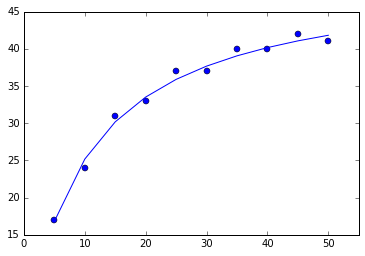

Standard error of the estimate of a saturation-growth-rate equation formula is 0.9016015125423512
The correlations coefficent of a saturation-growth-rate equation is 0.9945804920771856
Coefficent:
  l = 50.0921181921 
  b = 9.89136867953


In [342]:
x1 = np.array(np.zeros(10))
y1 = np.array(np.zeros(10))

for i in range(10):
    x1[i] = 1 / x[i]
    y1[i] = 1 / y[i]
sx = 0
sy = 0
sxy = 0
sxx = 0
std3 = 0
for i in range(n):
        sxy += x1[i] * y1[i]
        sx += x1[i]
        sy += y1[i]
        sxx += x1[i] * x1[i]
a1 = (n * sxy - sx*sy) / (n*sxx - sx * sx)
xm = sx / n
ym = sy / n
a0 = ym - a1 * xm

l = 1 / a0
b = a1 * l

y0 = np.array(np.zeros(10))
for i in range(n):
    y0[i]  = l*x[i]/(b+x[i])
    std3 += (y[i] - y0[i])**2 
r = sqrt((st-std3)/st)
std3 = sqrt(std3/(n-2))

axes = gca()
axes.set_xlim([0,55])
plot(x, y, 'bo')
plot(x, y0)
show()
print("Standard error of the estimate of a saturation-growth-rate equation formula is", std3)
print("The correlations coefficent of a saturation-growth-rate equation is", r)
print("Coefficent:\n  l =", l, "\n  b =", b)

The last method a parabola equation. To solve it we use matrix eqution with three coefficients and we can solve it by default operation of $numpy$ - $np.linalg.solve(a, b)$ 

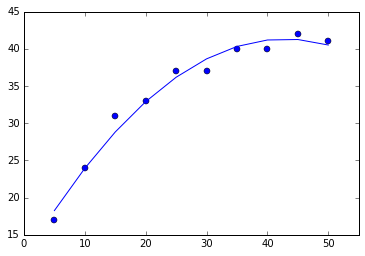

Standard error of the estimate of a parobola formula is  1.311619731609096
The correlations coefficent of a parobola formula is 0.989940741897905
Coefficent:
  a0 = 11.7666666667 
  a1 = 1.37787878788 
  a2 = -0.0160606060606


In [343]:
# Solving using numpy library "solve"
sx1 = 0
sx2 = 0
sx3 = 0
sx4 = 0
sy  = 0
sxy = 0
sxxy = 0
std4 = 0
for i in range (n):
    sx1 += x[i]
    sx2 += x[i]**2
    sx3 += x[i]**3
    sx4 += x[i]**4
    sy += y[i]
    sxy += x[i]*y[i]
    sxxy += x[i]*x[i]*y[i]
    
a = np.array([[n, sx1, sx2],
              [sx1,  sx2, sx3],
              [sx2, sx3, sx4]])

b = np.array([sy, sxy, sxxy])

a0,a1,a2 = np.linalg.solve(a,b)

y0 = np.array(np.zeros(10))
for i in range(n):
    y0[i] = a0 + a1*x[i] + a2*x[i]*x[i]
    std4 += (y[i] - y0[i])**2 
r = sqrt((st-std4)/st)
std4 = sqrt(std4/(n-3))

axes = gca()
axes.set_xlim([0,55])
plot(x, y, 'bo')
plot(x, y0)
show()
print("Standard error of the estimate of a parobola formula is ", std4)
print("The correlations coefficent of a parobola formula is", r)
print("Coefficent:\n  a0 =", a0, "\n  a1 =", a1, "\n  a2 =", a2)

Now, let's solve in 3D space with array of coordinates $x1$, $x2$ and $y$.  

In [344]:
x1 = np.array([0, 1, 1, 2, 2, 3, 3, 4, 4])
x2 = np.array([0, 1, 2, 1, 2, 1, 2, 1, 2])
y  = np.array([15.1, 17.9, 12.7, 25.6, 20.5, 35.1, 29.7, 45.4, 40.2])
n = 9

Let's plot a 3D space of these coordinates.

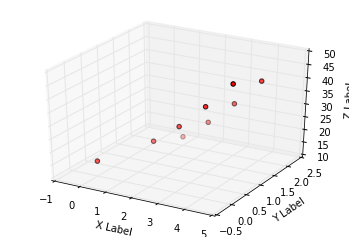

In [345]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


Here we use multiple linear regression to obtain curve fitting. We create a matrices $a$ and $b$. To solve matrix equation we again use $np.linalg.sove$.

In [346]:
a[0,0] = n
a[0,1] = a[0,2] = a[1,0] = a[1,1] = a[1,2] = a[2,0] = a[2,1] = a[2,2] = 0 
b[0] = b[1] = b[2] = 0
for i in range(n):
    a[0][1] += x1[i]
    a[0][2] += x2[i]
    a[1][0] += x1[i]
    a[1][1] += x1[i]**2
    a[1][2] += x1[i]*x2[i]
    a[2][0] += x2[i]
    a[2][1] += x1[i]*x2[i]
    a[2][2] += x2[i]**2
    b[0] += y[i]
    b[1] += x1[i]*y[i]
    b[2] += x2[i]*y[i]
a0,a1,a2 = np.linalg.solve(a,b)
y0 = np.array(np.zeros(10))
for i in range(n):
    y0[i] = a0 + a1 * x1[i] + a2 * x2[i]

Now let's plot a plane of obtained coefficients in eqution $z = a_0 + a_1x + a_2y$ and we can see how it coordinates lie on  plane.

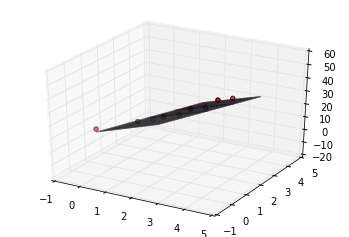

In [347]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0, 4, 80)            # points in the x axis
Y = np.linspace(0, 4, 80)            # points in the y axis
X, Y = np.meshgrid(x1, Y)              # create the "base grid"
Z = a0 + a1*X + a2*Y   
fig = plt.figure()
ax = fig.gca(projection='3d')         # set the 3d axes
ax.scatter(x1, x2, y, c='r', marker='o')
ax.plot_surface(X, Y, Z, 
                rstride=3, 
                cstride=3, 
                alpha=0.3,            # transparency of the surface 
                cmap=cm.BuPu)         # colour map
plt.show()

See below results.

In [348]:
ym = 0;
st = 0;
sr = 0;
std = 0;
for i in range(n):
    ym += y[i]
ym /= n
for i in range(n):
    st += (y[i] - ym)**2
    sr += (y[i] - y0[i])**2
std = sqrt(sr/(n-3))
r = sqrt((st-sr)/st)
print("Standard error of the estimate of a multiple linear regression is", std)
print("The correlations coefficent of a  multiple linear regression is", r)
print("Coefficent:\n  a0 =", a0, "\n  a1 =", a1, "\n  a2 =", a2)

Standard error of the estimate of a multiple linear regression is 1.240324875627934
The correlations coefficent of a  multiple linear regression is 0.9956313336607736
Coefficent:
  a0 = 12.8695652174 
  a1 = 9.31739130435 
  a2 = -5.34782608696


## Discussion
For 2D space we saw four methods. All methods were acceptable, curves fit to data. As we said in theory part, the best curve fitting belongs to method with minimal standard error of estimate. So we saw that the best is a saturation-growth-rate equation. Moreover correlation coefficient of this method was closer to 1 compared to another method.

For 3D space we also saw that standard error of estimate satisfies to good result and correlation coefficients was close to 1.

## Conclusion

Finally let's emphasize that all methods were used linearization. The last two methods were used matrix equations with 3 coefficients. Each of them got acceptable results.
For each method we created a 2D or 3D graph to see graphical results. Coefficients, stantard error of estimate and correlations coefficent were provided and compared